In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

# Байесовский вывод для испытаний Бернулли

0.007161458311215217


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


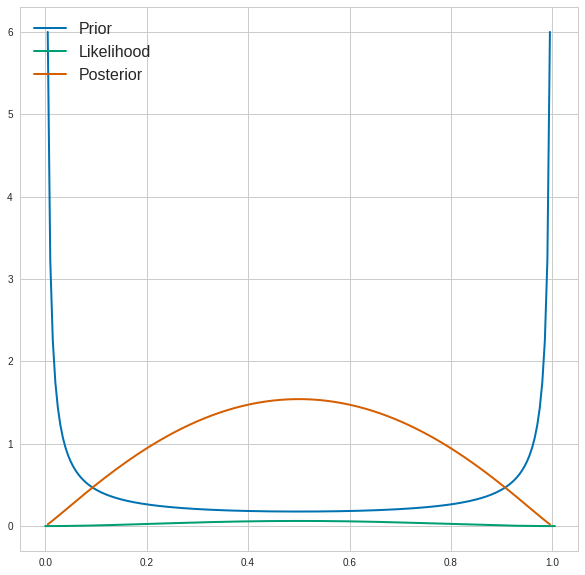

In [11]:
xs = np.arange(0, 1.01, 0.005)

## Априорное распределение
pri = st.beta(0.1, 0.1).pdf
norm_prior = 1 #integrate.quad(lambda x: pri(x), -np.inf, np.inf)[0]
ys_prior = [ pri(x) / norm_prior for x in xs ]

## Правдоподобие
n_heads, n_tails = 2, 2
lk = lambda x : x ** n_heads * (1 - x) ** n_tails
ys_like = [ lk(x) for x in xs ]

## Апостериорное распределение
post = lambda x : lk(x) * pri(x)
norm_post = integrate.quad(post, 0, 1)[0]
print(norm_post)
ys_post = [ post(x) / norm_post for x in xs ]

## И нарисуем
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_prior, linewidth=2, label="Prior")
ax.plot(xs, ys_like, linewidth=2, label="Likelihood")
ax.plot(xs, ys_post, linewidth=2, label="Posterior")
ax.set_xlim((-0.05, 1.05))
ax.legend(loc="upper left", fontsize=legend_fontsize)
plt.show()